<a href="https://colab.research.google.com/github/Shubham-naik-ai/Reunion/blob/main/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Reunion Assessment**

# **Problem Description**

### **TASK-1**

1. Do the Exploratory Data Analysis & share the insights.
2. How would you segment customers based on their risk (of default).
3. Which of these segments / sub-segments would you propose be approved?
    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?
4. Tell us what your observations were on the data itself (completeness, skews).

In [1]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Reunion/'

Mounted at /content/drive


In [2]:
# Importing usefull libraries


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC


In [3]:
#Loading the Dataset
appl_df = pd.read_csv(working_dir_path + 'applicant.csv')

In [4]:
loan_df = pd.read_csv(working_dir_path + 'loan.csv')

In [5]:
appl_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [6]:
# Printing the first 5 observation from the data
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [7]:
new1 = [appl_df,loan_df]

In [8]:
train_df = appl_df.merge(loan_df)

In [9]:
train_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [10]:
# Checking the dimensions
train_df.shape

(1000, 27)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

By using the info function we came to know that there are few missing values in our dataset.

In [12]:
train_df.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# Renaming few columns for better understanding

train_df.rename(columns={'Has_been_employed_for_at_least':'empd_for_atleast','Has_been_employed_for_at_most ':'empd_for_atmost','EMI_rate_in_percentage_of_disposable_income':'EMI_rate_prcnt','Balance_in_existing_bank_account_(lower_limit_of_bucket)':'A/c balance lower','Balance_in_existing_bank_account_(upper_limit_of_bucket)':'A/c balance upper'},inplace = True)
train_df.columns  

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status', 'empd_for_atleast',
       'Has_been_employed_for_at_most', 'Telephone', 'Foreign_worker',
       'Savings_account_balance', 'A/c balance lower', 'A/c balance upper',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_prcnt', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [14]:
# Checking null value count

train_df.isnull().sum()

applicant_id                               0
Primary_applicant_age_in_years             0
Gender                                     0
Marital_status                             0
Number_of_dependents                       0
Housing                                    0
Years_at_current_residence                 0
Employment_status                          0
empd_for_atleast                          62
Has_been_employed_for_at_most            253
Telephone                                596
Foreign_worker                             0
Savings_account_balance                  183
A/c balance lower                        668
A/c balance upper                        457
loan_application_id                        0
Months_loan_taken_for                      0
Purpose                                   12
Principal_loan_amount                      0
EMI_rate_prcnt                             0
Property                                 154
Has_coapplicant                            0
Has_guaran

# **Handling missing values**

In [15]:
# Filling the 'NaN' field from the 'empd_for_atleast_' column to '0 year'

train_df['empd_for_atleast'] =  train_df['empd_for_atleast'].fillna('0 year')

In [16]:
# Filling the 'NaN' field from the 'Has_been_employed_for_at_most' column to '7+ year'

train_df['Has_been_employed_for_at_most'] =  train_df['Has_been_employed_for_at_most'].fillna('7+ years')

In [17]:
# define conditions and values
conditions = [train_df['Housing'] == 'own',train_df['Housing']=='rent',train_df['Housing']=='for free']
values = ['real estate','car or other','building society savings agreement/life insurance']

# apply logic where Property is null
train_df['Property'] = np.where(train_df['Property'].isnull(),
                              np.select(conditions, values),
                              train_df['Property'])

In [18]:
# Filling the 'NaN' values in 'Savings_account_balance' to 'Low'

train_df['Savings_account_balance'] = train_df['Savings_account_balance'].fillna('Low')

Dropping the columns which are not very useful for the model

In [19]:
train_df.drop(['Other_EMI_plans'],axis = 1 ,inplace = True)

In [20]:
train_df.drop(['Telephone'],axis = 1 ,inplace = True)

In [21]:
train_df.dropna(subset=['Purpose'], inplace=True)

In [22]:
# Filling '0' in 'A/c balance lower' where field is 'NaN'
train_df['A/c balance lower'] = train_df['A/c balance lower'].fillna('0')

In [23]:
# Filling '0' in 'A/c balance upper' where field is 'NaN'
train_df['A/c balance upper'] = train_df['A/c balance upper'].fillna('0')

In [24]:
# Final check for any null values or untreated values
train_df.isnull().sum()

applicant_id                             0
Primary_applicant_age_in_years           0
Gender                                   0
Marital_status                           0
Number_of_dependents                     0
Housing                                  0
Years_at_current_residence               0
Employment_status                        0
empd_for_atleast                         0
Has_been_employed_for_at_most            0
Foreign_worker                           0
Savings_account_balance                  0
A/c balance lower                        0
A/c balance upper                        0
loan_application_id                      0
Months_loan_taken_for                    0
Purpose                                  0
Principal_loan_amount                    0
EMI_rate_prcnt                           0
Property                                 0
Has_coapplicant                          0
Has_guarantor                            0
Number_of_existing_loans_at_this_bank    0
Loan_histor

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   applicant_id                           988 non-null    int64 
 1   Primary_applicant_age_in_years         988 non-null    int64 
 2   Gender                                 988 non-null    object
 3   Marital_status                         988 non-null    object
 4   Number_of_dependents                   988 non-null    int64 
 5   Housing                                988 non-null    object
 6   Years_at_current_residence             988 non-null    int64 
 7   Employment_status                      988 non-null    object
 8   empd_for_atleast                       988 non-null    object
 9   Has_been_employed_for_at_most          988 non-null    object
 10  Foreign_worker                         988 non-null    int64 
 11  Savings_account_bal

# **Exploratory Data Analysis**

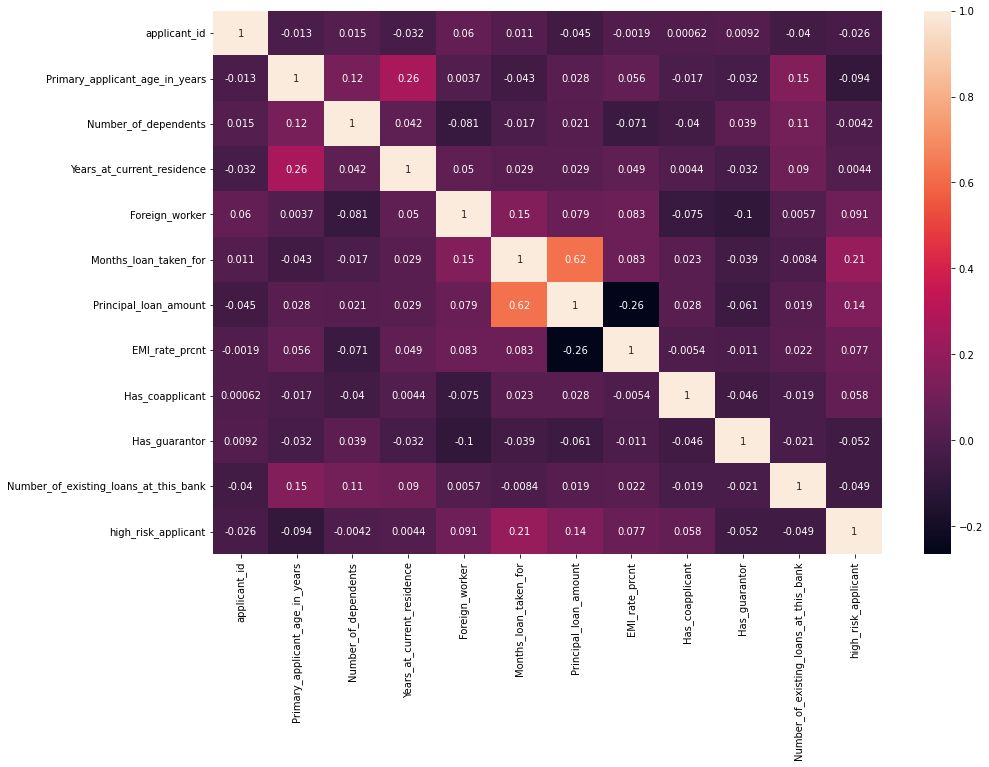

In [26]:
# Correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [27]:
# Counting observations from 'high_risk_applicants'
train_df["high_risk_applicant"].value_counts()

0    693
1    295
Name: high_risk_applicant, dtype: int64

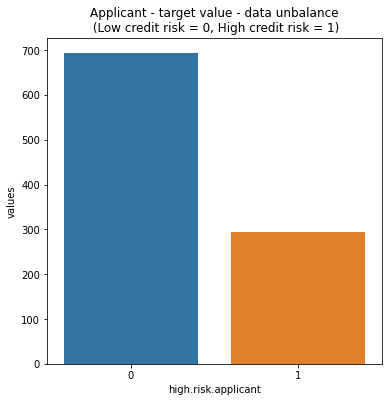

In [28]:
# Storing observations from 'high_risk_applicants'
temp = train_df["high_risk_applicant"].value_counts()
df = pd.DataFrame({'high.risk.applicant': temp.index,'values': temp.values})

# Plotting to check Low credit risk vs High credit risk applicants

plt.figure(figsize = (6,6))
plt.title('Applicant - target value - data unbalance\n (Low credit risk = 0, High credit risk = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'high.risk.applicant', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [29]:
# Count based on applicants gender
train_df['Gender'].value_counts()

male      681
female    307
Name: Gender, dtype: int64

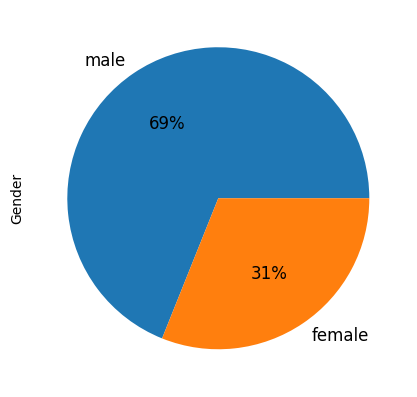

In [30]:
# Pie-chart to show the amount of male applicants vs female applicants

fig = plt.figure(figsize=(5,5), dpi=100)
train_df['Gender'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

In [31]:
# Marital status of each applicant
train_df["Marital_status"].value_counts()

single                        540
divorced/separated/married    307
married/widowed                92
divorced/separated             49
Name: Marital_status, dtype: int64

In [32]:
# Check where the applicant has their own/rent/for free house
train_df["Housing"].value_counts()

own         705
rent        179
for free    104
Name: Housing, dtype: int64

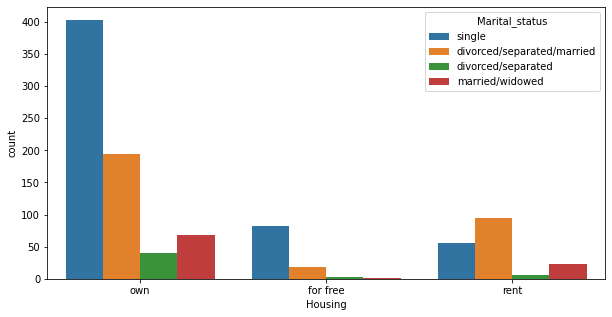

In [33]:
# Plotting room_type and neighbourhood_group on a bar-graph

plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Housing', hue = 'Marital_status')

In [34]:
# Count number of dependents applicants
train_df["Number_of_dependents"].value_counts()

1    835
2    153
Name: Number_of_dependents, dtype: int64

In [35]:
# Count how many years an applicant has been in same residence
train_df["Years_at_current_residence"].value_counts()

4    408
2    306
3    144
1    130
Name: Years_at_current_residence, dtype: int64

In [36]:
# Check the employement status of each applicant
train_df["Employment_status"].value_counts()

skilled employee / official                                         629
unskilled - resident                                                199
management / self-employed / highly qualified employee / officer    139
unemployed / unskilled - non-resident                                21
Name: Employment_status, dtype: int64

In [37]:
# Box plot showing the marital status and employement status of each applicant

def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=train_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

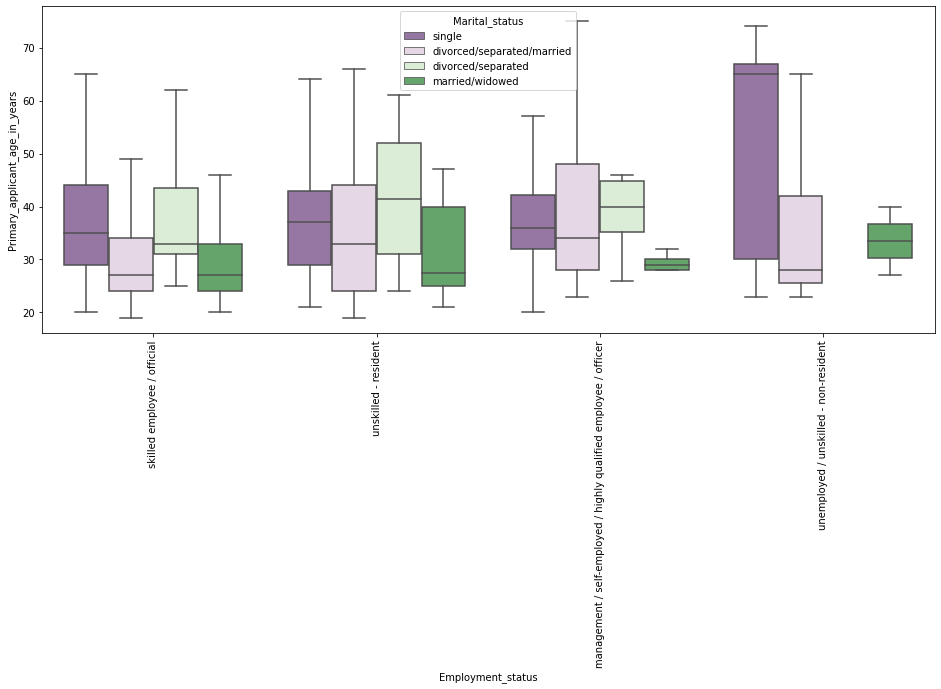

In [38]:
# Boxplots with age distribution grouped by education and marriage.

boxplot_variation('Employment_status','Primary_applicant_age_in_years', 'Marital_status')

In [39]:
# Check the applicant having minimum employement years of experience
train_df["empd_for_atleast"].value_counts()

1 year     335
7 years    249
0 year     230
4 years    174
Name: empd_for_atleast, dtype: int64

In [40]:
# Check the applicant having maximum employement years of experience
train_df["Has_been_employed_for_at_most"].value_counts()

4 years     335
7+ years    249
7 years     174
1 year      172
0 year       58
Name: Has_been_employed_for_at_most, dtype: int64

In [41]:
# Purpose of each applicant to get the loan
train_df["Purpose"].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [42]:
# Property owned by each applicant
train_df["Property"].value_counts()

car or other                                         345
building society savings agreement/life insurance    331
real estate                                          312
Name: Property, dtype: int64

In [43]:
# Check for any existing loan to be payed by each applicant
train_df["Number_of_existing_loans_at_this_bank"].value_counts()

1    627
2    327
3     28
4      6
Name: Number_of_existing_loans_at_this_bank, dtype: int64

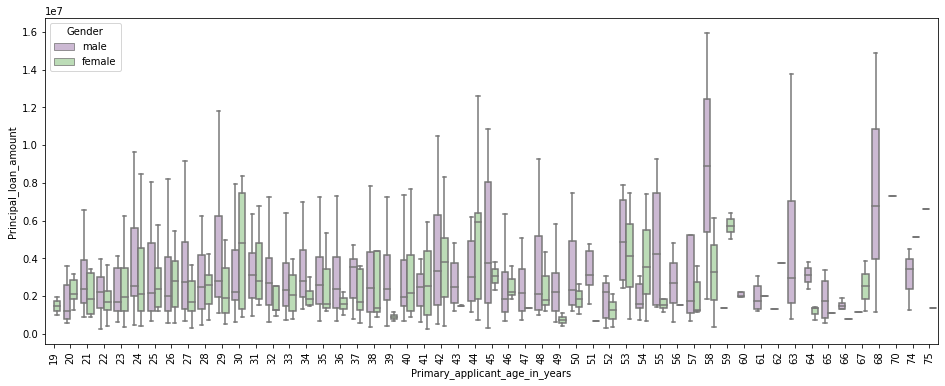

In [44]:
# Let's show the boxplots with credit amount limit distribution grouped by age and sex.

boxplot_variation('Primary_applicant_age_in_years','Principal_loan_amount', 'Gender',16)

In [45]:
# Check high risk applicants
train_df["high_risk_applicant"].value_counts()

0    693
1    295
Name: high_risk_applicant, dtype: int64

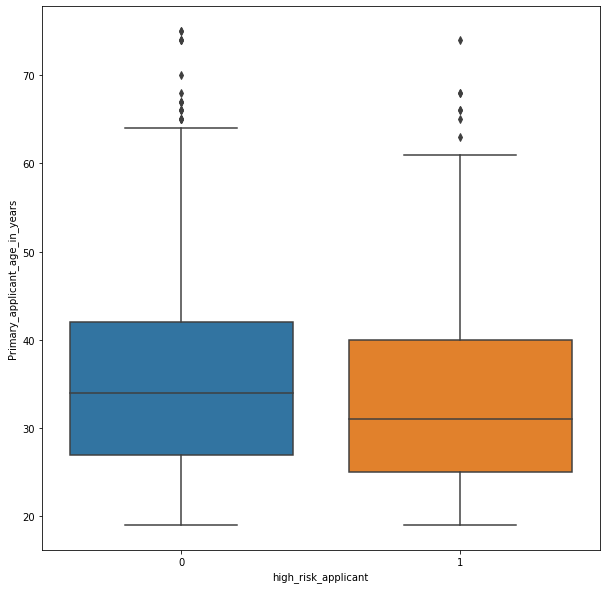

In [46]:
# Check high risk applicants based on their age group

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="high_risk_applicant", y="Primary_applicant_age_in_years", data=train_df)

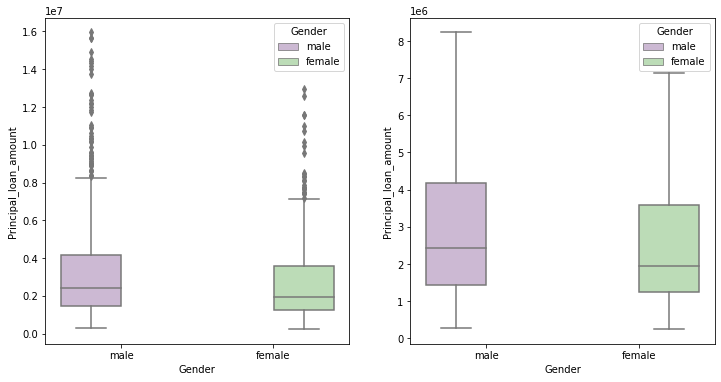

In [47]:
#Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Gender", y="Principal_loan_amount", hue="Gender",data=train_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Gender", y="Principal_loan_amount", hue="Gender",data=train_df, palette="PRGn",showfliers=False)
plt.show();

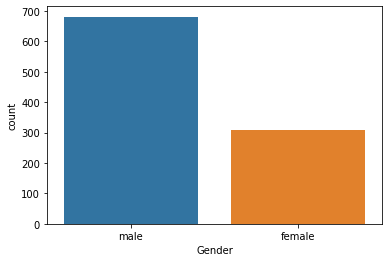

In [48]:
# Gender plot of applicants
sns.countplot(x='Gender',data=train_df)

There are more male applicants than female

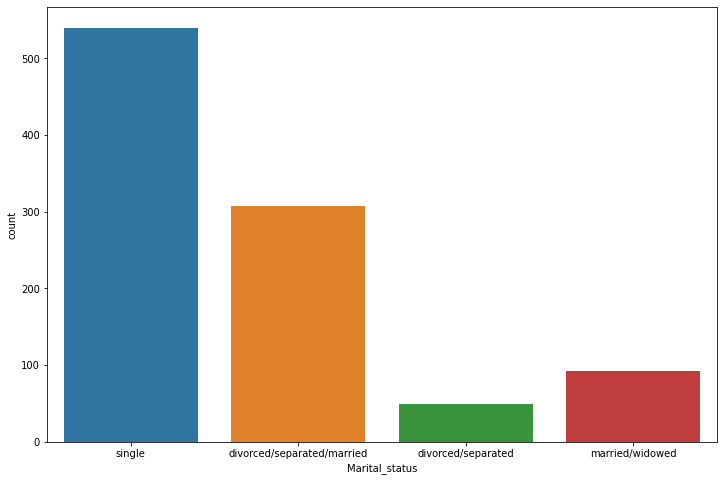

In [49]:
# Marital status of applicants
plt.figure(figsize=(12,8))
sns.countplot(x='Marital_status',data=train_df)

There are many applicants with marital status of single

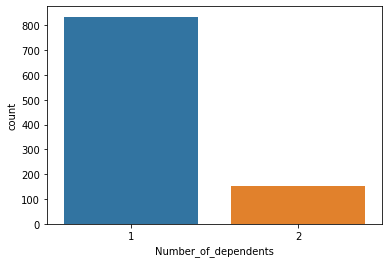

In [50]:
# plot showing the number of dependents among the applicants
sns.countplot(x='Number_of_dependents',data=train_df)

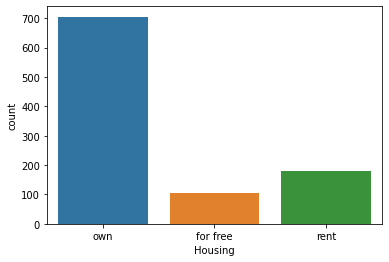

In [51]:
# Plot showing the housing of applicants
sns.countplot(x='Housing',data=train_df)

Many applicants have their own housing property

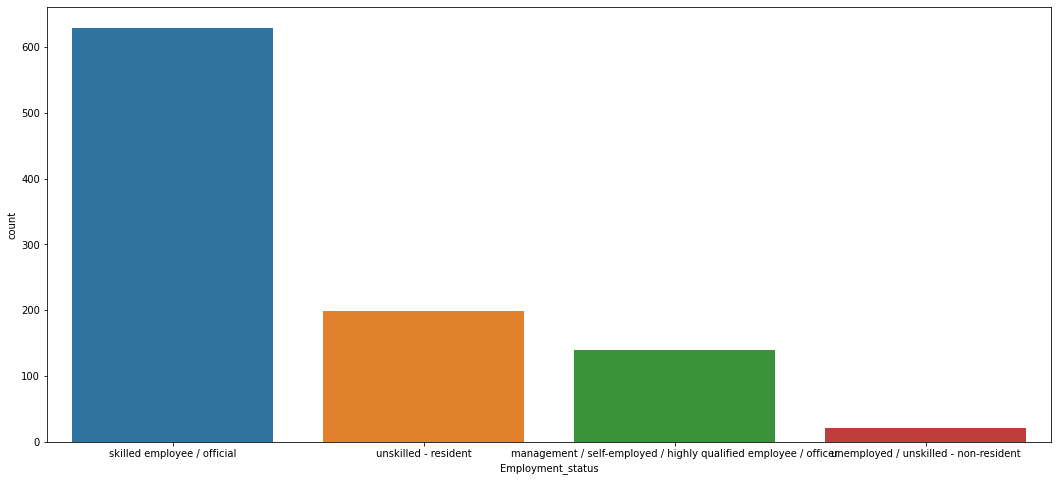

In [52]:
plt.figure(figsize=(18,8))
sns.countplot(x='Employment_status',data=train_df)

Many applicants are skilled employee or officials

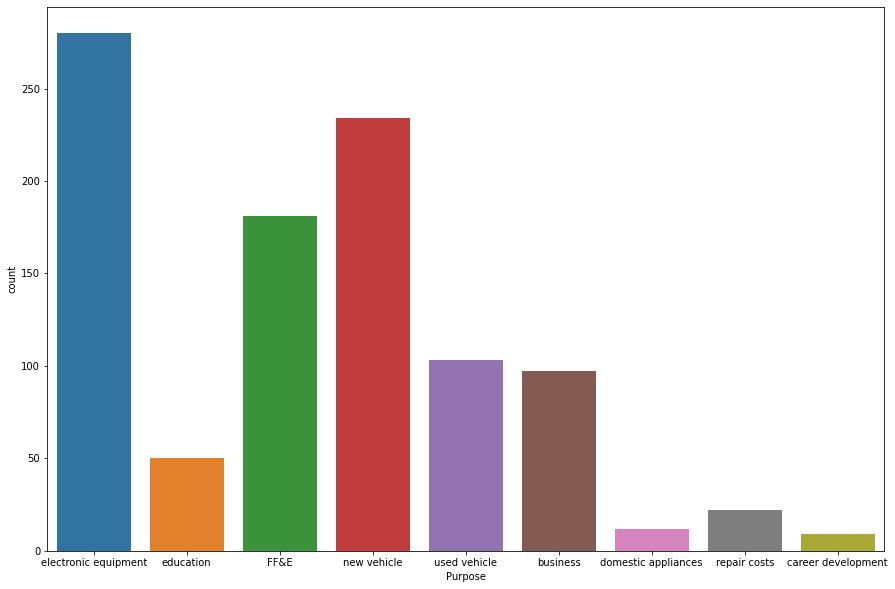

In [53]:
# Plot showing the purpose of applicants to get the loan
plt.figure(figsize=(15,10))
sns.countplot(x='Purpose',data=train_df)

Most of the applicants bought the loan for buying electronic equipment

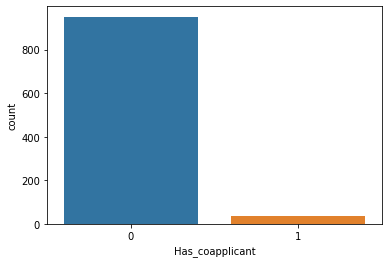

In [54]:
sns.countplot(x='Has_coapplicant',data=train_df)

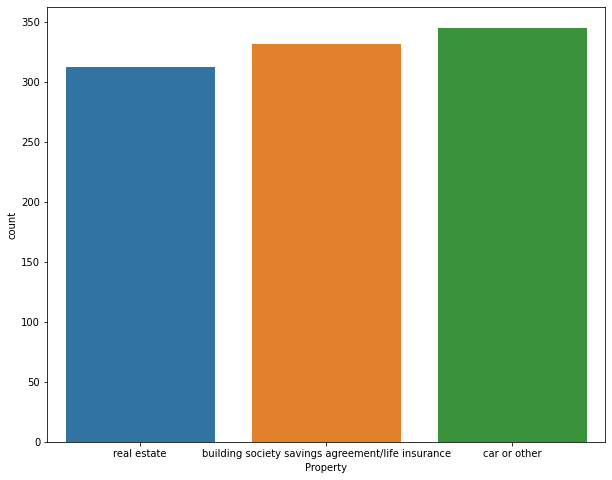

In [55]:
# Plot showing the type of property owned by the applicant
plt.figure(figsize=(10,8))
sns.countplot(x='Property',data=train_df)

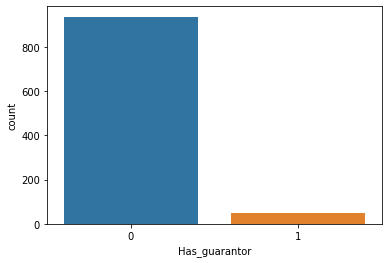

In [56]:
sns.countplot(x='Has_guarantor',data=train_df)

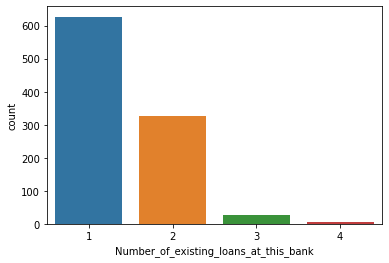

In [57]:
# Count of applicants having existing number of loan
sns.countplot(x='Number_of_existing_loans_at_this_bank',data=train_df)

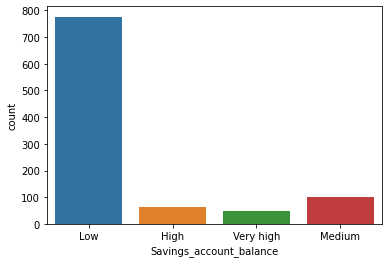

In [58]:
# Plot showing the savings account balance of applicant
sns.countplot(x='Savings_account_balance',data=train_df)

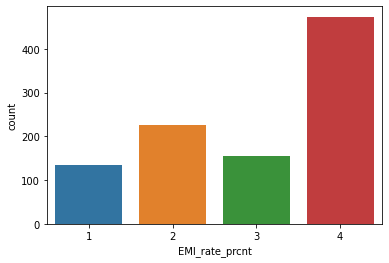

In [59]:
sns.countplot(x='EMI_rate_prcnt',data=train_df)

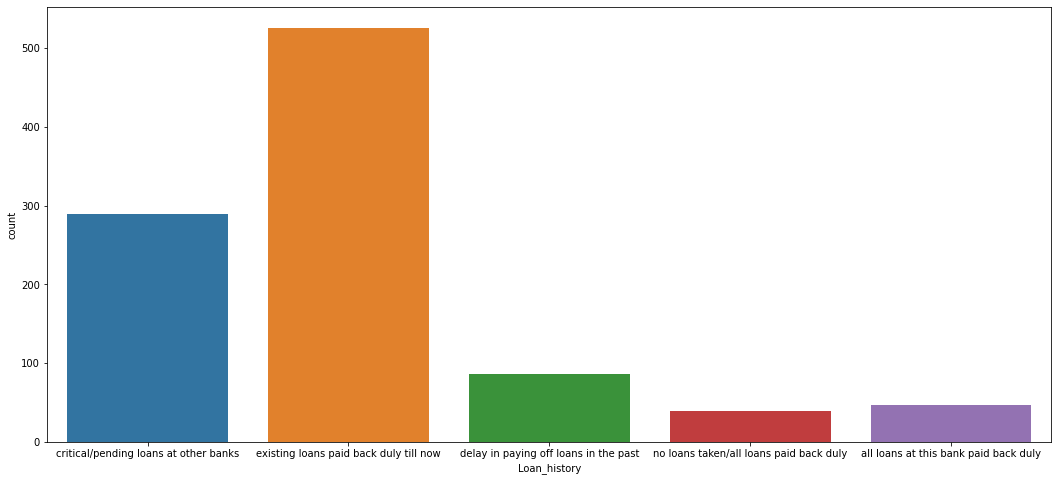

In [60]:
plt.figure(figsize=(18,8))
sns.countplot(x='Loan_history',data=train_df)

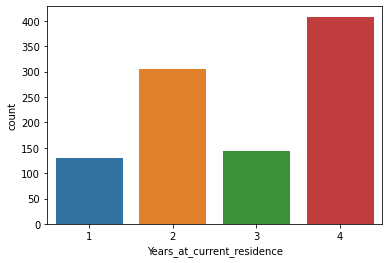

In [61]:
# Plot showing how many applicants have been living in the same residence
sns.countplot(x='Years_at_current_residence',data=train_df)

In [62]:
#Exporting final data for model building

df.to_csv('/content/drive/My Drive/Reunion/finaldata.csv', encoding='utf-8', index=False)